In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

data = pd.read_excel('../../bd/BANCO_FINAL.xlsx')

In [3]:
# TODO: Calculate number of students
n_students = data.shape[0]

# TODO: Calculate number of features
n_features = len(data.columns[:-2])

# TODO: Calculate passing students
n_curso = data[data.DESISTENTE == 'SIM'].shape[0]

# TODO: Calculate failing students
n_desistentes = data[data.DESISTENTE == 'NÃO'].shape[0]

# TODO: Calculate graduation rate
grad_rate = 1 - n_desistentes/n_students

# Print the results
print ("Número total de estudantes: {}".format(n_students))
print ("Número de características: {}".format(n_features))
print ("Número de estudantes em curso: {}".format(n_curso))
print ("Número de estudantes desistentes: {}".format(n_desistentes))
print ("Taxa de desistentes: {:.2f}%".format(grad_rate*100))

Número total de estudantes: 7156
Número de características: 26
Número de estudantes em curso: 2137
Número de estudantes desistentes: 5019
Taxa de desistentes: 29.86%


In [4]:
print(list(data.columns.values))

['INGRESSOCPF', 'CAMPUS', 'ANO', 'DESISTENTE', 'SITUAÇÃO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'CR', 'renda sm', 'Pessoas que vivem com essa renda', 'renda per']


In [5]:
# Extract feature columns
feature_cols = ['CAMPUS', 'ANO', 'Q1', 'Q2', 'Q3', 
                'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
                'Q10', 'Q11', 'Q12', 'Q13', 'Q14',
                'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
                'CR', 'renda sm',
                'Pessoas que vivem com essa renda', 'renda per']

# Extract target column 'passed'
target_col = ['DESISTENTE']

# Show the list of columns
print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

Feature columns:
['CAMPUS', 'ANO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'CR', 'renda sm', 'Pessoas que vivem com essa renda', 'renda per']

Target column: ['DESISTENTE']


In [6]:
# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = data[feature_cols]
y_all = data[target_col]

In [7]:
if True:
    def preprocess_features(X):
        ''' Preprocesses the student data and converts non-numeric binary variables into
            binary (0/1) variables. Converts categorical variables into dummy variables. '''

        # Initialize new output DataFrame
        output = pd.DataFrame(index = X.index)

        # Investigate each feature column for the data
        for col, col_data in X.iteritems():

            # If data type is non-numeric, replace all yes/no values with 1/0
            if col_data.dtype == object:
                col_data = col_data.replace(['SIM', 'NÃO'], [1, 0])

            # If data type is categorical, convert to dummy variables
            if col_data.dtype == object:
                # Example: 'school' => 'school_GP' and 'school_MS'
                col_data = pd.get_dummies(col_data, prefix = col)  

            # Collect the revised columns
            output = output.join(col_data)

        return output

    X_all = preprocess_features(X_all)
    #y_all = preprocess_features(y_all)
print ("Processed feature columns ({} total features):\n".format(len(X_all.columns)))

Processed feature columns (75 total features):



In [8]:
X_norm = (X_all - X_all.mean()) / (X_all.max() - X_all.min())

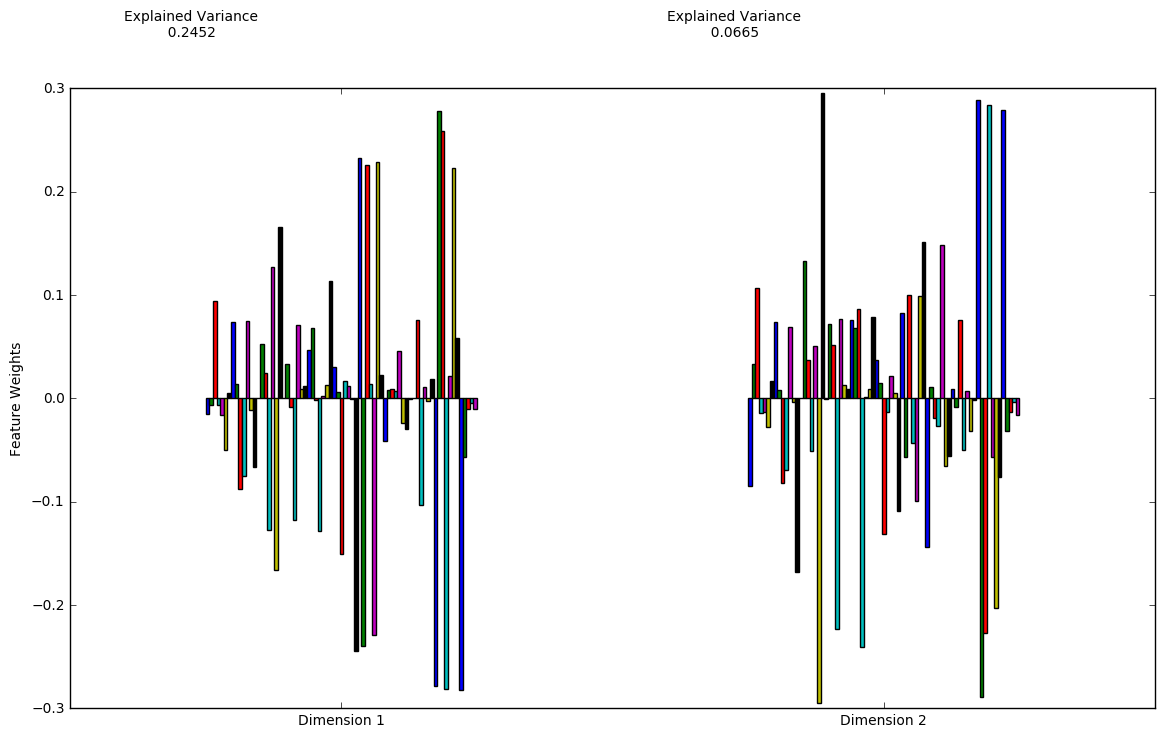

In [9]:
from sklearn.decomposition import PCA
pca = PCA(2, random_state=42).fit(X_norm)
reduced_data = pca.transform(X_norm)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# Generate PCA results plot
import render as rs
pca_results = rs.pca_results(X_norm, pca)

In [10]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn.metrics import silhouette_score

for n in range(2,10):
    clusterer = KMeans(n_clusters=n, random_state=42).fit(X_all)

# TODO: Predict the cluster for each data point
    preds = clusterer.predict(X_all)

# TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(X_all)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(X_all, preds)
    print ("Silhouette Score for {0} clusters is {1:.4f}.".format(n, score))

Silhouette Score for 2 clusters is 0.5141.
Silhouette Score for 3 clusters is 0.3136.
Silhouette Score for 4 clusters is 0.2761.
Silhouette Score for 5 clusters is 0.2768.
Silhouette Score for 6 clusters is 0.2251.
Silhouette Score for 7 clusters is 0.2235.
Silhouette Score for 8 clusters is 0.2226.
Silhouette Score for 9 clusters is 0.2049.


In [11]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn.metrics import silhouette_score

for n in range(2,10):
    clusterer = KMeans(n_clusters=n, random_state=42).fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(reduced_data)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print ("Silhouette Score for {0} clusters is {1:.4f}.".format(n, score))

Silhouette Score for 2 clusters is 0.5769.
Silhouette Score for 3 clusters is 0.5541.
Silhouette Score for 4 clusters is 0.5439.
Silhouette Score for 5 clusters is 0.5260.
Silhouette Score for 6 clusters is 0.5023.
Silhouette Score for 7 clusters is 0.4664.
Silhouette Score for 8 clusters is 0.4424.
Silhouette Score for 9 clusters is 0.4380.


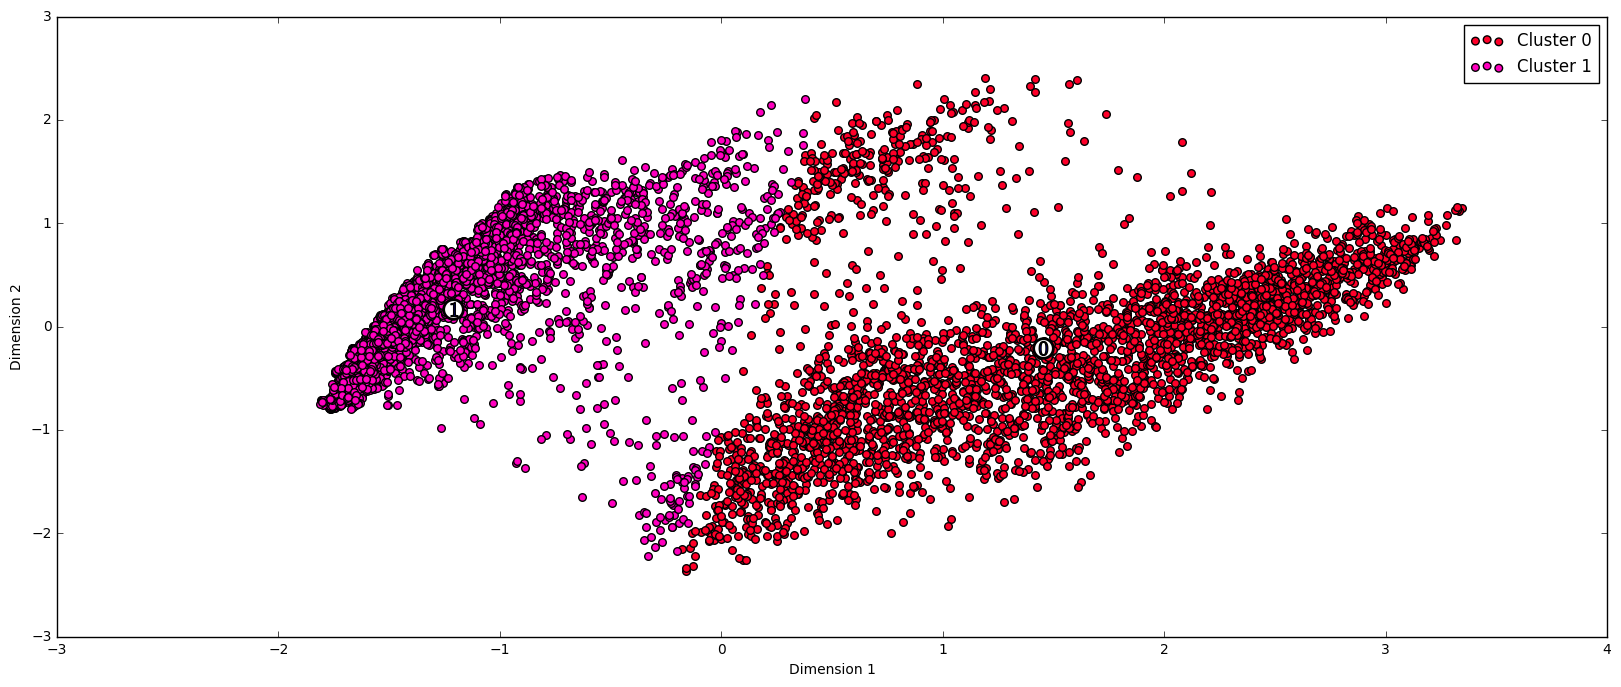

In [12]:
# Display the results of the clustering from implementation
clusterer = KMeans(n_clusters=2, random_state=5).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(reduced_data)

rs.cluster_results(reduced_data, preds, centers)

In [13]:
centers

array([[ 1.4546029 , -0.20806215],
       [-1.2116723 ,  0.17331407]])

In [14]:
y_clu = []
for row in reduced_data.iterrows():
    if np.linalg.norm(row[1]-centers[0]) > np.linalg.norm(row[1]-centers[1]):
        y_clu.append(0)
    else:
        y_clu.append(1)
print(y_clu)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [15]:
X_all['clusters'] = y_clu
X_all.head()

,CAMPUS_B. SANTISTA,CAMPUS_DIADEMA,CAMPUS_GUARULHOS,CAMPUS_OSASCO,CAMPUS_S.JOSÉ DOS CAMPOS,CAMPUS_S.PAULO,ANO,Q1_Casado(a) / mora com um(a) companheiro(a) / união estável,Q1_Separado(a) / divorciado(a) / desquitado(a),Q1_Solteiro(a),...,Q18_Nunca trabalhei,"Q18_Sem jornada fixa, até 10 horas semanais",Q19_Antes dos 18 anos,Q19_Após os 18 anos,Q19_Nunca trabalhei enquanto estudava,CR,renda sm,Pessoas que vivem com essa renda,renda per,clusters
0,0.0,0.0,0.0,0.0,0.0,1.0,2012,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,8.621,15.000000,4,3.750000,0
1,0.0,1.0,0.0,0.0,0.0,0.0,2014,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.000,7.983425,4,1.995856,0
2,0.0,0.0,0.0,0.0,0.0,1.0,2012,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,8.168,25.000000,5,5.000000,0
3,0.0,0.0,0.0,0.0,0.0,1.0,2013,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,7.151,22.123894,4,5.530973,0
4,1.0,0.0,0.0,0.0,0.0,0.0,2012,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,8.342,8.500000,5,1.700000,0


In [16]:
pd.set_option('display.max_rows', len(X_all))

In [17]:
y_clu.count(0)

3904

In [18]:
from IPython.display import display, HTML


In [19]:
HTML(X_all[X_all.clusters == 0].mode().to_html())

,CAMPUS_B. SANTISTA,CAMPUS_DIADEMA,CAMPUS_GUARULHOS,CAMPUS_OSASCO,CAMPUS_S.JOSÉ DOS CAMPOS,CAMPUS_S.PAULO,ANO,Q1_Casado(a) / mora com um(a) companheiro(a) / união estável,Q1_Separado(a) / divorciado(a) / desquitado(a),Q1_Solteiro(a),Q2_Não tenho filhos (as),Q2_Tenho filhos (as),Q3_Amarelo (a),Q3_Branco (a),Q3_Indígena,Q3_Pardo (a),Q3_Preto (a),Q4_Diurno,Q4_Noturno,Q5_Escola Particular,Q5_Escola Pública,Q5_Exterior,Q6_Ensino Fundamental Completo/Ensino Médio Incompleto,Q6_Ensino Médio Completo/Superior Incompleto,Q6_Ensino Superior Completo,Q6_Ensino fundamental Incompleto,Q6_Não Sei,Q6_Sem instrução / Não Alfabetizado,Q7_Ensino fundamental Completo/Ensino médio incompleto,Q7_Ensino fundamental Incompleto,Q7_Ensino médio completo/Superior Incompleto,Q7_Ensino superior Completo,Q7_Não sei,Q7_Sem instrução/Não alfabetizado,Q8_Eu,Q8_Meu (minha) Cônjuge ou Companheiro,Q8_Meu filho ou outra pessoa,"Q8_Meus Pais (Meu pai, Minha Mãe, Meus irmãos)",Q9,Q10_Companheiro(a) / Cônjuge,Q10_Outra pessoa ou familiar,Q10_Seus pais,Q10_Você mesmo (a),Q11_Desempregado,Q11_Empregado (a),Q11_Outra situação,Q12_Nunca trabalhei,Q12_Trabalho com ou sem carteira assinada,Q13_Com a família /companheiro(o)/cônjuge,"Q13_Com outros estudantes, em residência alugada",Q13_Outro,Q13_Sozinho,Q14_Entre 30 e 60 minutos,Q14_Mais de 1 hora,Q14_Menos de 30 minutos,Q14_Não sei responder,Q15_No estado de São Paulo,Q15_Outro,Q16_Com o cônjuge ou companheiro (a),Q16_Com os pais,Q16_Outra situação,"Q16_República, pensão, habitação coletiva, etc.",Q16_Sozinho (a),Q17_Não,Q17_Sim,Q18_Com jornada fixa,Q18_Nunca trabalhei,"Q18_Sem jornada fixa, até 10 horas semanais",Q19_Antes dos 18 anos,Q19_Após os 18 anos,Q19_Nunca trabalhei enquanto estudava,CR,renda sm,Pessoas que vivem com essa renda,renda per,clusters
0,0.0,0.0,0.0,0.0,0.0,0.0,2014,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8.5,4,1.474926,0


In [20]:
y_clu.count(1)

3252

In [21]:
HTML(X_all[X_all.clusters == 1].mode().to_html())

,CAMPUS_B. SANTISTA,CAMPUS_DIADEMA,CAMPUS_GUARULHOS,CAMPUS_OSASCO,CAMPUS_S.JOSÉ DOS CAMPOS,CAMPUS_S.PAULO,ANO,Q1_Casado(a) / mora com um(a) companheiro(a) / união estável,Q1_Separado(a) / divorciado(a) / desquitado(a),Q1_Solteiro(a),Q2_Não tenho filhos (as),Q2_Tenho filhos (as),Q3_Amarelo (a),Q3_Branco (a),Q3_Indígena,Q3_Pardo (a),Q3_Preto (a),Q4_Diurno,Q4_Noturno,Q5_Escola Particular,Q5_Escola Pública,Q5_Exterior,Q6_Ensino Fundamental Completo/Ensino Médio Incompleto,Q6_Ensino Médio Completo/Superior Incompleto,Q6_Ensino Superior Completo,Q6_Ensino fundamental Incompleto,Q6_Não Sei,Q6_Sem instrução / Não Alfabetizado,Q7_Ensino fundamental Completo/Ensino médio incompleto,Q7_Ensino fundamental Incompleto,Q7_Ensino médio completo/Superior Incompleto,Q7_Ensino superior Completo,Q7_Não sei,Q7_Sem instrução/Não alfabetizado,Q8_Eu,Q8_Meu (minha) Cônjuge ou Companheiro,Q8_Meu filho ou outra pessoa,"Q8_Meus Pais (Meu pai, Minha Mãe, Meus irmãos)",Q9,Q10_Companheiro(a) / Cônjuge,Q10_Outra pessoa ou familiar,Q10_Seus pais,Q10_Você mesmo (a),Q11_Desempregado,Q11_Empregado (a),Q11_Outra situação,Q12_Nunca trabalhei,Q12_Trabalho com ou sem carteira assinada,Q13_Com a família /companheiro(o)/cônjuge,"Q13_Com outros estudantes, em residência alugada",Q13_Outro,Q13_Sozinho,Q14_Entre 30 e 60 minutos,Q14_Mais de 1 hora,Q14_Menos de 30 minutos,Q14_Não sei responder,Q15_No estado de São Paulo,Q15_Outro,Q16_Com o cônjuge ou companheiro (a),Q16_Com os pais,Q16_Outra situação,"Q16_República, pensão, habitação coletiva, etc.",Q16_Sozinho (a),Q17_Não,Q17_Sim,Q18_Com jornada fixa,Q18_Nunca trabalhei,"Q18_Sem jornada fixa, até 10 horas semanais",Q19_Antes dos 18 anos,Q19_Após os 18 anos,Q19_Nunca trabalhei enquanto estudava,CR,renda sm,Pessoas que vivem com essa renda,renda per,clusters
0,0.0,0.0,0.0,0.0,0.0,0.0,2014,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.5,4,1.381215,1


In [22]:
pd.reset_option('display.max_rows')

In [23]:
X_all['evasao'] = y_all
X_all.head()

,CAMPUS_B. SANTISTA,CAMPUS_DIADEMA,CAMPUS_GUARULHOS,CAMPUS_OSASCO,CAMPUS_S.JOSÉ DOS CAMPOS,CAMPUS_S.PAULO,ANO,Q1_Casado(a) / mora com um(a) companheiro(a) / união estável,Q1_Separado(a) / divorciado(a) / desquitado(a),Q1_Solteiro(a),...,"Q18_Sem jornada fixa, até 10 horas semanais",Q19_Antes dos 18 anos,Q19_Após os 18 anos,Q19_Nunca trabalhei enquanto estudava,CR,renda sm,Pessoas que vivem com essa renda,renda per,clusters,evasao
0,0.0,0.0,0.0,0.0,0.0,1.0,2012,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,8.621,15.000000,4,3.750000,0,NÃO
1,0.0,1.0,0.0,0.0,0.0,0.0,2014,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000,7.983425,4,1.995856,0,SIM
2,0.0,0.0,0.0,0.0,0.0,1.0,2012,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,8.168,25.000000,5,5.000000,0,NÃO
3,0.0,0.0,0.0,0.0,0.0,1.0,2013,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,7.151,22.123894,4,5.530973,0,NÃO
4,1.0,0.0,0.0,0.0,0.0,0.0,2012,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,8.342,8.500000,5,1.700000,0,NÃO


In [31]:
sum(X_all[X_all.clusters == 1]['evasao'] == 'SIM') / X_all[X_all.clusters == 0]['evasao'].count()

0.31634221311475408

In [30]:
sum(X_all[X_all.clusters == 1]['evasao'] == 'SIM') / X_all[X_all.clusters == 1]['evasao'].count()

0.37976629766297665